# Team 7 - Financial situation's Impact on Turnout in Pennsylvania
Team Members: Luke Hong, Caroline Lun, Weijia Suo, Zijing Wang, Aaron Wen

### Definition: 
Our goal is to analyze how the family fianical situation of counties affects voter turnout in Pennsylvania, a swinging state. We will be looking at the total income, income per capita and etc. of voters to see how these economic factors affect voter turnout and party identification in Pennsylvania. Through our analysis, we are hoping to understand the top biggest financial factors of the turnout in Pennsylvania and able to explain why after analysis. 

### Dataset Source:
National voter dataset acquired by BU (https://www.bu.edu/cds-faculty/2021/12/16/bu-announces-new-data-source-national-voter-file/), + additional datasets may be added as we proceed and dive deeper into the topic. 

US GDP by County: https://www.bea.gov/data/gdp/gdp-county-metro-and-other-areas
US Personal Income by County: https://www.bea.gov/data/income-saving/personal-income-county-metro-and-other-areas

### Introduction & Motivation
Voter participation is essential for success of any democratic system. In order ensure an effective dmocratic system, we need to increase voter participation by not only identifying non-participating voters but also udnerstanding the reasons why they are not participating. Our project will focuse on one aspect of the issue, financial situation of voters, to see if we can explain voter participation from financial situation point of view along with baisc informatioon about voters. 

### Project Overview


1.   Data Preparation and Cleaning
2.   EDA
3.   Model Building
4.   Summary



## Importing packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import *
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType
! pip install pyzipcode
from pyzipcode import ZipCodeDatabase


## Import Data

In [ ]:
df = spark.read.format("csv").option("header", "true").option("nullValue", "NA").option("delimiter","\t").option("inferSchema", "true").load("gs://voters_data/VM2Uniform/VM2Uniform--PA--2021-05-20")
 

## 1.Data Preparation and Cleaning

### 1.1 Select features that are relevant to the topic of our project
    First we filtered the columns we were interested in according to the topic, and stored them as 'df_basic' and 'df_Commercial'. 'df_basic' for some basic information about the voter, 'df_Commercial' for the attributes that reflect the economic status of the bidder's family.

In [ ]:
#select features that are relevant to the topic of our project
df_basic = df.select("LALVOTERID",
"Voters_Active",
"Residence_Addresses_Zip",
"Voters_Gender",
"Voters_Age",
"Parties_Description",
"Ethnic_Description",
"Religions_Description",
"Democratic_Zone",
"Republican_Area",
"Mailing_Addresses_City",
"General_2020",
"General_2016",
"General_2012",
"General_2008",
"General_2004",
"General_2000"
)

In [ ]:
df_Commercial = df.select("LALVOTERID",
"CommercialData_Education",
"CommercialData_EstHomeValue",
"Residence_Families_HHCount",
"CommercialData_EstimatedHHIncomeAmount",
"CommercialData_EstimatedHHIncome",
"CommercialData_EstimatedAreaMedianHHIncome",
"CommercialData_HomePurchasePrice",
"CommercialData_LandValue",
"CommercialData_HHComposition",
"CommercialData_OccupationGroup",
"CommercialData_OccupationIndustry",
"CommercialDataLL_Home_Owner_Or_Renter"
)

In [ ]:
#select features that are relevant to the topic of our project
df = df.select("LALVOTERID",
"Voters_Active",
"Residence_Addresses_Zip",
"Voters_Gender",
"Voters_Age",
"Parties_Description",
"Ethnic_Description",
"Religions_Description",
"Democratic_Zone",
"Republican_Area",
"Mailing_Addresses_City",
"General_2020",
"General_2016",
"General_2012",
"General_2008",
"General_2004",
"General_2000",
"CommercialData_Education",
"CommercialData_EstHomeValue",
"CommercialData_EstimatedHHIncomeAmount",
"CommercialData_EstimatedHHIncome",
"Residence_Families_HHCount",
"CommercialData_EstimatedAreaMedianHHIncome",
"CommercialData_HomePurchasePrice",
"CommercialData_LandValue",
"CommercialData_HHComposition",
"CommercialData_OccupationGroup",
"CommercialData_OccupationIndustry",
"CommercialDataLL_Home_Owner_Or_Renter"
)

In [ ]:
df.cache()

22/04/29 17:36:29 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


DataFrame[LALVOTERID: string, Voters_Active: string, Residence_Addresses_Zip: int, Voters_Gender: string, Voters_Age: int, Parties_Description: string, Ethnic_Description: string, Religions_Description: string, Democratic_Zone: string, Republican_Area: string, Mailing_Addresses_City: string, General_2020: string, General_2016: string, General_2012: string, General_2008: string, General_2004: string, General_2000: string, CommercialData_Education: string, CommercialData_EstHomeValue: string, CommercialData_EstimatedHHIncomeAmount: string, CommercialData_EstimatedHHIncome: string, Residence_Families_HHCount: int, CommercialData_EstimatedAreaMedianHHIncome: string, CommercialData_HomePurchasePrice: string, CommercialData_LandValue: string, CommercialData_HHComposition: string, CommercialData_OccupationGroup: string, CommercialData_OccupationIndustry: string, CommercialDataLL_Home_Owner_Or_Renter: string]

In [ ]:
df.printSchema()

root
 |-- LALVOTERID: string (nullable = true)
 |-- Voters_Active: string (nullable = true)
 |-- Residence_Addresses_Zip: integer (nullable = true)
 |-- Voters_Gender: string (nullable = true)
 |-- Voters_Age: integer (nullable = true)
 |-- Parties_Description: string (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- Religions_Description: string (nullable = true)
 |-- Democratic_Zone: string (nullable = true)
 |-- Republican_Area: string (nullable = true)
 |-- Mailing_Addresses_City: string (nullable = true)
 |-- General_2020: string (nullable = true)
 |-- General_2016: string (nullable = true)
 |-- General_2012: string (nullable = true)
 |-- General_2008: string (nullable = true)
 |-- General_2004: string (nullable = true)
 |-- General_2000: string (nullable = true)
 |-- CommercialData_Education: string (nullable = true)
 |-- CommercialData_EstHomeValue: string (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: string (nullable = true)
 |-- Commerci

In [ ]:
orig_rows = df.count()
orig_columns = columns= len(df.columns)

print("The original Spark dataframe after selection has {:,} rows and {} columns.".format(orig_rows, orig_columns))

The original Spark dataframe after selection has 8,360,530 rows and 29 columns.


### 1.2 Formatting Columns

After we filter out some columns, the values of some of them may have implications for our subsequent study. We will work with these columns here.

First of all, for 'general_xxxx', the null value means that this voter did not vote in that year, so we fill the null value with 'N'.

In [ ]:
fill_vals = {'General_2020':'N','General_2016':'N', 'General_2012':'N', 'General_2008':'N', 'General_2004':'N', 'General_2000':'N'}
df = df.fillna(fill_vals)

Next, we need to process 'CommercialData_EstimatedHHIncomeAmount' to turn it into an integer.

In [ ]:
df = df.withColumn('CommercialData_EstimatedHHIncomeAmount', F.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('double'))
df.select("CommercialData_EstimatedHHIncomeAmount").show()

+--------------------------------------+
|CommercialData_EstimatedHHIncomeAmount|
+--------------------------------------+
|                                  null|
|                               35000.0|
|                              101000.0|
|                              158000.0|
|                               26000.0|
|                               26000.0|
|                                  null|
|                               49000.0|
|                               84000.0|
|                                  null|
|                                  null|
|                                  null|
|                                  null|
|                               60000.0|
|                               98000.0|
|                               98000.0|
|                               64166.0|
|                                  null|
|                                  null|
|                                  null|
+--------------------------------------+
only showing top

"CommercialData_EstHomeValue" , "CommercialData_EstimatedAreaMedianHHIncome"is a string type in the existing dataset, we need to convert it to a numeric format to facilitate the subsequent operations.

In [ ]:
df = df.withColumn('CommercialData_EstHomeValue', F.regexp_replace('CommercialData_EstHomeValue', '[$,]', '').cast('double'))
df = df.withColumn('CommercialData_EstimatedAreaMedianHHIncome', F.regexp_replace('CommercialData_EstimatedAreaMedianHHIncome', '[$,]', '').cast('double'))
df = df.withColumn('CommercialData_LandValue', F.regexp_replace('CommercialData_LandValue', '[$,]', '').cast('double'))
df.printSchema()

root
 |-- LALVOTERID: string (nullable = true)
 |-- Voters_Active: string (nullable = true)
 |-- Residence_Addresses_Zip: integer (nullable = true)
 |-- Voters_Gender: string (nullable = true)
 |-- Voters_Age: integer (nullable = true)
 |-- Parties_Description: string (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- Religions_Description: string (nullable = true)
 |-- Democratic_Zone: string (nullable = true)
 |-- Republican_Area: string (nullable = true)
 |-- Mailing_Addresses_City: string (nullable = true)
 |-- General_2020: string (nullable = false)
 |-- General_2016: string (nullable = false)
 |-- General_2012: string (nullable = false)
 |-- General_2008: string (nullable = false)
 |-- General_2004: string (nullable = false)
 |-- General_2000: string (nullable = false)
 |-- CommercialData_Education: string (nullable = true)
 |-- CommercialData_EstHomeValue: double (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: double (nullable = true)
 |-- Co

### 1.3 Check Missing Value

Now that we have taken a look at the data, lets see how many columns have null values

In [ ]:
# Check null values for each column

null_value_cols = [( df.where(col(c).isNull()).count(), format(df.where(col(c).isNull()).count()/orig_rows, ".2%") , c) for c in df.columns]
null_value_cols.sort(reverse = True)
null_value_cols

[(8008323, '95.79%', 'Democratic_Zone'),
 (8008322, '95.79%', 'Republican_Area'),
 (6550704, '78.35%', 'CommercialData_OccupationIndustry'),
 (6208822, '74.26%', 'CommercialData_HHComposition'),
 (5317695, '63.60%', 'CommercialData_HomePurchasePrice'),
 (4489692, '53.70%', 'Religions_Description'),
 (3402444, '40.70%', 'CommercialData_OccupationGroup'),
 (3307771, '39.56%', 'CommercialData_LandValue'),
 (2840124, '33.97%', 'CommercialData_Education'),
 (2050543, '24.53%', 'CommercialDataLL_Home_Owner_Or_Renter'),
 (980863, '11.73%', 'Ethnic_Description'),
 (361391, '4.32%', 'CommercialData_EstimatedAreaMedianHHIncome'),
 (227094, '2.72%', 'CommercialData_EstimatedHHIncomeAmount'),
 (227094, '2.72%', 'CommercialData_EstimatedHHIncome'),
 (224766, '2.69%', 'CommercialData_EstHomeValue'),
 (34772, '0.42%', 'Voters_Gender'),
 (4137, '0.05%', 'Voters_Age'),
 (867, '0.01%', 'Residence_Addresses_Zip'),
 (814, '0.01%', 'Mailing_Addresses_City'),
 (766, '0.01%', 'Voters_Active'),
 (766, '0.01%'

### 1.4 Deal with Missing Value

After checking the percentage of null values, the economic data we are interested in 'CommercialData_EstHomeValue', 'CommercialData_EstimatedHHIncome ', 'CommercialData_EstimatedAreaMedianHHIncome', 'CommercialDataLL_Home_Owner_Or_ Renter' all have fewer null values. The columns with more null values are mainly from personal information, which is not very helpful for our subsequent research on personal income, so we believe that it is better to delete these columns directly comparing to fill under this situation.

We will delete the columns which countain more than 50% null. The following columns will be deleted:
* 'Democratic_Zone'
* 'Republican_Area'
* 'CommercialData_OccupationIndustry'
* 'CommercialData_HHComposition'
* 'CommercialData_HomePurchasePrice'
* 'Religions_Description'

In [ ]:
df = df.drop('Democratic_Zone')
df = df.drop('Republican_Area')
df = df.drop('CommercialData_OccupationIndustry')
df = df.drop('CommercialData_HHComposition')
df = df.drop('CommercialData_HomePurchasePrice')
df = df.drop('Religions_Description')

In [ ]:
# Check null values for each column again

null_value_cols = [( df.where(col(c).isNull()).count(), format(df.where(col(c).isNull()).count()/orig_rows, ".2%") , c) for c in df.columns]
null_value_cols.sort(reverse = True)
null_value_cols

[(3402444, '40.70%', 'CommercialData_OccupationGroup'),
 (3307771, '39.56%', 'CommercialData_LandValue'),
 (2840124, '33.97%', 'CommercialData_Education'),
 (2050543, '24.53%', 'CommercialDataLL_Home_Owner_Or_Renter'),
 (980863, '11.73%', 'Ethnic_Description'),
 (361391, '4.32%', 'CommercialData_EstimatedAreaMedianHHIncome'),
 (227094, '2.72%', 'CommercialData_EstimatedHHIncomeAmount'),
 (227094, '2.72%', 'CommercialData_EstimatedHHIncome'),
 (224766, '2.69%', 'CommercialData_EstHomeValue'),
 (34772, '0.42%', 'Voters_Gender'),
 (4137, '0.05%', 'Voters_Age'),
 (867, '0.01%', 'Residence_Addresses_Zip'),
 (814, '0.01%', 'Mailing_Addresses_City'),
 (766, '0.01%', 'Voters_Active'),
 (766, '0.01%', 'Residence_Families_HHCount'),
 (766, '0.01%', 'Parties_Description'),
 (766, '0.01%', 'LALVOTERID'),
 (0, '0.00%', 'General_2020'),
 (0, '0.00%', 'General_2016'),
 (0, '0.00%', 'General_2012'),
 (0, '0.00%', 'General_2008'),
 (0, '0.00%', 'General_2004'),
 (0, '0.00%', 'General_2000')]

In [ ]:
# Fill 'CommercialData_OccupationGroup' as 1 and consider he/she are single.

df = df.na.fill({'CommercialData_OccupationGroup': 1})

In [ ]:
# Fill 'CommercialData_LandValue' as average based on his zipcode.
import pyspark.sql.functions as F

zip_Landvalue = df.groupBy("Residence_Addresses_Zip").avg("CommercialData_LandValue").withColumnRenamed("avg(CommercialData_LandValue)", "avg_CommercialData_LandValue")
temp_df = df.join(zip_Landvalue, df.Residence_Addresses_Zip == zip_Landvalue.Residence_Addresses_Zip, "left").drop(zip_Landvalue.Residence_Addresses_Zip)
temp_df = temp_df.withColumn("CommercialData_LandValue",F.when(F.col("CommercialData_LandValue").isNull(), F.col("avg_CommercialData_LandValue")).otherwise(F.col("CommercialData_LandValue"))) 
temp_df = temp_df.drop('avg_CommercialData_LandValue')
df = temp_df

In [ ]:
# 'CommercialData_Education' will be filled as 'unkown'
df = df.na.fill({'CommercialData_Education': 'unkown'})

In [ ]:
# 'CommercialDataLL_Home_Owner_Or_Renter' will be filled as 'unkown'
df = df.na.fill({'CommercialDataLL_Home_Owner_Or_Renter': 'unkown'})

In [ ]:
# 'Ethnic_Description' will be filled as 'unkown'
df = df.na.fill({'Ethnic_Description': 'unkown'})

In [ ]:
# Fill 'CommercialData_EstimatedAreaMedianHHIncome' as average based on his zipcode.
import pyspark.sql.functions as F

zip_MedianHHIncome = df.groupBy("Residence_Addresses_Zip").avg("CommercialData_EstimatedAreaMedianHHIncome").withColumnRenamed("avg(CommercialData_EstimatedAreaMedianHHIncome)", "avg_CommercialData_EstimatedAreaMedianHHIncome")
temp_df = df.join(zip_MedianHHIncome, df.Residence_Addresses_Zip == zip_MedianHHIncome.Residence_Addresses_Zip, "left").drop(zip_MedianHHIncome.Residence_Addresses_Zip)
temp_df = temp_df.withColumn("CommercialData_EstimatedAreaMedianHHIncome",F.when(F.col("CommercialData_EstimatedAreaMedianHHIncome").isNull(), F.col("avg_CommercialData_EstimatedAreaMedianHHIncome")).otherwise(F.col("CommercialData_EstimatedAreaMedianHHIncome"))) 
temp_df = temp_df.drop('avg_CommercialData_EstimatedAreaMedianHHIncome')
df = temp_df

In [ ]:
# 'Voters_Gender' will be filled as 'unkown'
df = df.na.fill({'Voters_Gender': 'unkown'})

In [ ]:
# 'Voters_Age' will be filled as 'unkown'
df = df.na.fill({'Voters_Age': 'unkown'})

In [ ]:
null_value_cols = [( df.where(col(c).isNull()).count(), format(df.where(col(c).isNull()).count()/orig_rows, ".2%") , c) for c in df.columns]
null_value_cols.sort(reverse = True)
null_value_cols

[(227094, '2.72%', 'CommercialData_EstimatedHHIncomeAmount'),
 (227094, '2.72%', 'CommercialData_EstimatedHHIncome'),
 (224766, '2.69%', 'CommercialData_EstHomeValue'),
 (12790, '0.15%', 'CommercialData_EstimatedAreaMedianHHIncome'),
 (4137, '0.05%', 'Voters_Age'),
 (1801, '0.02%', 'CommercialData_LandValue'),
 (867, '0.01%', 'Residence_Addresses_Zip'),
 (814, '0.01%', 'Mailing_Addresses_City'),
 (766, '0.01%', 'Voters_Active'),
 (766, '0.01%', 'Residence_Families_HHCount'),
 (766, '0.01%', 'Parties_Description'),
 (766, '0.01%', 'LALVOTERID'),
 (0, '0.00%', 'Voters_Gender'),
 (0, '0.00%', 'General_2020'),
 (0, '0.00%', 'General_2016'),
 (0, '0.00%', 'General_2012'),
 (0, '0.00%', 'General_2008'),
 (0, '0.00%', 'General_2004'),
 (0, '0.00%', 'General_2000'),
 (0, '0.00%', 'Ethnic_Description'),
 (0, '0.00%', 'CommercialData_OccupationGroup'),
 (0, '0.00%', 'CommercialData_Education'),
 (0, '0.00%', 'CommercialDataLL_Home_Owner_Or_Renter')]

'CommercialData_EstimatedHHIncomeAmount', 'CommercialData_EstimatedHHIncome' can't be determined by zipcode and also a value can't be defined by fillna().' CommercialData_EstHomeValue' is the data we have already cleaned up, and also there is no better way to handle the remaining data. Therefore, we choose to delete all the remaining missing value rows.

In [ ]:
df_dropall = df.dropna()

In [ ]:
orig_rows = df.count()
orig_columns = columns= len(df.columns)

print("Before dropping columns, the Spark dataframe has {:,} rows and {} columns.".format(orig_rows, orig_columns))

Before dropping columns, the Spark dataframe has 8,360,530 rows and 23 columns.


In [ ]:
dropall_rows = df_dropall.count()
dropall_columns = columns= len(df_dropall.columns)

print("If we dropping remaining null values, the Spark dataframe will have {:,} rows and {} columns.".format(dropall_rows, dropall_columns))

If we dropping remaining null values, the Spark dataframe will have 8,083,632 rows and 23 columns.


Next, we will check the influence of targer variable if missing values are removed.

In [ ]:
# Check target variable ratio before dropping
df.where(df.General_2020 == 'Y').count()/df.where(df.General_2020 == 'N').count()

4.307979813178574

In [ ]:
# Check target variable ratio after dropping
df_dropall.where(df_dropall.General_2020 == 'Y').count()/df_dropall.where(df_dropall.General_2020 == 'N').count()

4.544519359374464

Next, we will examine the data distribution after missing values are removed.

In [ ]:
df.describe().toPandas()

,summary,LALVOTERID,Voters_Active,Voters_Gender,Voters_Age,Parties_Description,Ethnic_Description,Mailing_Addresses_City,General_2020,General_2016,...,CommercialData_Education,CommercialData_EstHomeValue,CommercialData_EstimatedHHIncomeAmount,CommercialData_EstimatedHHIncome,Residence_Families_HHCount,CommercialData_EstimatedAreaMedianHHIncome,CommercialData_LandValue,CommercialData_OccupationGroup,CommercialDataLL_Home_Owner_Or_Renter,Residence_Addresses_Zip
0,count,8359764,8359764,8360530,8356393,8359764,8360530,8359716,8360530,8360530,...,8360530,8135764,8133436,8133436,8359764,8347740,8358729,8360530,8360530,8359663
1,mean,None,None,None,50.8788442573249,None,None,None,None,None,...,None,247516.20870627515,92061.56092074739,None,2.0398827048227677,84328.84418315953,34510.06609548265,1.0,None,17627.635671677195
2,stddev,None,None,None,18.658121673737366,None,None,None,None,None,...,None,179381.57177531044,57619.606564381706,None,0.9415433736686906,36144.21988158994,55276.36344938216,0.0,None,1502.1120665493354
3,min,LALPA100000,A,F,18,American,Afghan,Aaronsburg,N,N,...,Bach Degree - Extremely Likely,6371.0,6000.0,$1000-14999,1,0.0,1000.0,1,Likely Homeowner,5405
4,max,LALPA999998,I,unkown,100,Whig,unkown,Zullinger,Y,Y,...,unkown,4999331.0,312499.0,$75000-99999,10,312499.0,9999000.0,Technical: Computers/Math and Architect/Engine...,unkown,96857


In [ ]:
df_dropall.describe().toPandas()

,summary,LALVOTERID,Voters_Active,Voters_Gender,Voters_Age,Parties_Description,Ethnic_Description,Mailing_Addresses_City,General_2020,General_2016,...,CommercialData_Education,CommercialData_EstHomeValue,CommercialData_EstimatedHHIncomeAmount,CommercialData_EstimatedHHIncome,Residence_Families_HHCount,CommercialData_EstimatedAreaMedianHHIncome,CommercialData_LandValue,CommercialData_OccupationGroup,CommercialDataLL_Home_Owner_Or_Renter,Residence_Addresses_Zip
0,count,8083632,8083632,8083632,8083632,8083632,8083632,8083632,8083632,8083632,...,8083632,8083632,8083632,8083632,8083632,8083632,8083632,8083632,8083632,8083632
1,mean,None,None,None,50.93885854774191,None,None,None,None,None,...,None,247962.30503949214,92232.66234793964,None,2.060775775047652,84485.72104584465,34435.44807096698,1.0,None,17630.38525962092
2,stddev,None,None,None,18.519233048813344,None,None,None,None,None,...,None,179452.63027458053,57616.90513863067,None,0.9418309314675275,36240.984281793826,55076.2761699384,0.0,None,1503.5626570173567
3,min,LALPA1000001,A,F,18,American,Afghan,Aaronsburg,N,N,...,Bach Degree - Extremely Likely,6371.0,6000.0,$1000-14999,1,0.0,1000.0,1,Likely Homeowner,15001
4,max,LALPA999998,I,unkown,100,Whig,unkown,Zullinger,Y,Y,...,unkown,4999331.0,312499.0,$75000-99999,10,312499.0,9999000.0,Technical: Computers/Math and Architect/Engine...,unkown,19611


Through the above analysis of target variable and statistical variables, we can confirm that deleting the missing value has little influence on the whole data set.

In [ ]:
df = df_dropall

In [ ]:
# Check null values for each column

null_value_cols = [( df.where(col(c).isNull()).count(), format(df.where(col(c).isNull()).count()/orig_rows, ".2%") , c) for c in df.columns]
null_value_cols.sort(reverse = True)
null_value_cols

[(0, '0.00%', 'Voters_Gender'),
 (0, '0.00%', 'Voters_Age'),
 (0, '0.00%', 'Voters_Active'),
 (0, '0.00%', 'Residence_Families_HHCount'),
 (0, '0.00%', 'Residence_Addresses_Zip'),
 (0, '0.00%', 'Parties_Description'),
 (0, '0.00%', 'Mailing_Addresses_City'),
 (0, '0.00%', 'LALVOTERID'),
 (0, '0.00%', 'General_2020'),
 (0, '0.00%', 'General_2016'),
 (0, '0.00%', 'General_2012'),
 (0, '0.00%', 'General_2008'),
 (0, '0.00%', 'General_2004'),
 (0, '0.00%', 'General_2000'),
 (0, '0.00%', 'Ethnic_Description'),
 (0, '0.00%', 'CommercialData_OccupationGroup'),
 (0, '0.00%', 'CommercialData_LandValue'),
 (0, '0.00%', 'CommercialData_EstimatedHHIncomeAmount'),
 (0, '0.00%', 'CommercialData_EstimatedHHIncome'),
 (0, '0.00%', 'CommercialData_EstimatedAreaMedianHHIncome'),
 (0, '0.00%', 'CommercialData_EstHomeValue'),
 (0, '0.00%', 'CommercialData_Education'),
 (0, '0.00%', 'CommercialDataLL_Home_Owner_Or_Renter')]

In [ ]:
df.cache()

DataFrame[LALVOTERID: string, Voters_Active: string, Voters_Gender: string, Voters_Age: int, Parties_Description: string, Ethnic_Description: string, Mailing_Addresses_City: string, General_2020: string, General_2016: string, General_2012: string, General_2008: string, General_2004: string, General_2000: string, CommercialData_Education: string, CommercialData_EstHomeValue: double, CommercialData_EstimatedHHIncomeAmount: double, CommercialData_EstimatedHHIncome: string, Residence_Families_HHCount: int, CommercialData_EstimatedAreaMedianHHIncome: double, CommercialData_LandValue: double, CommercialData_OccupationGroup: string, CommercialDataLL_Home_Owner_Or_Renter: string, Residence_Addresses_Zip: int]

In [ ]:
df.toPandas().head(5)

,LALVOTERID,Voters_Active,Voters_Gender,Voters_Age,Parties_Description,Ethnic_Description,Mailing_Addresses_City,General_2020,General_2016,General_2012,...,CommercialData_Education,CommercialData_EstHomeValue,CommercialData_EstimatedHHIncomeAmount,CommercialData_EstimatedHHIncome,Residence_Families_HHCount,CommercialData_EstimatedAreaMedianHHIncome,CommercialData_LandValue,CommercialData_OccupationGroup,CommercialDataLL_Home_Owner_Or_Renter,Residence_Addresses_Zip
0,LALPA1877509,A,M,61,Republican,Italian,Bovard,Y,Y,Y,...,HS Diploma - Likely,119564.0,92000.0,$75000-99999,3,59499.000000,6642.857143,Other,Likely Homeowner,15619
1,LALPA130336826,A,F,58,Republican,Italian,Bovard,Y,Y,Y,...,Bach Degree - Extremely Likely,119564.0,92000.0,$75000-99999,3,59499.000000,6642.857143,Other,Likely Homeowner,15619
2,LALPA8319904,A,M,31,Republican,German,Port Orchard,N,N,N,...,unkown,119564.0,92000.0,$75000-99999,3,59499.000000,6642.857143,1,unkown,15619
3,LALPA1753526,A,M,87,Democratic,English/Welsh,Bovard,Y,Y,Y,...,HS Diploma - Likely,119564.0,15000.0,$15000-24999,1,59499.000000,6642.857143,Retired,unkown,15619
4,LALPA1831394,A,F,62,Democratic,English/Welsh,Bovard,Y,Y,Y,...,HS Diploma - Extremely Likely,112500.0,93000.0,$75000-99999,1,58703.545455,6642.857143,Sales,Likely Homeowner,15619


In [ ]:
# Save Cleaned dataset to csv file

df.write.option("header",True).mode('overwrite').csv("gs://voters_data/VM2Uniform/CleanedData.csv")

### 1.5 Adding Useful Custom Columns

First, we create a new column 'PerIncome' and use the total income of the household divided by the number of people in the household to calculate the distributable income of each person in the household.

In [ ]:
df = df.withColumn("PerIncome",round(col("CommercialData_EstimatedHHIncomeAmount")/col("Residence_Families_HHCount"), 2))
df.select("PerIncome").show()

+---------+
|PerIncome|
+---------+
| 30666.67|
| 30666.67|
| 30666.67|
|  15000.0|
|  93000.0|
|  42500.0|
|  42500.0|
|  47000.0|
|  47000.0|
|  29749.5|
|  29749.5|
|  71000.0|
|  59499.0|
|   9000.0|
|  59499.0|
|  66000.0|
|  29749.5|
|  29749.5|
|  10000.0|
|  36000.0|
+---------+
only showing top 20 rows



Another variable we care about is the ratio of income to home value; if the ratio of income to home is higher, it indicates a higher standard of living.

In [ ]:
df = df.withColumn("IncomeHMValue",round(col("CommercialData_EstimatedHHIncomeAmount")/col("CommercialData_EstHomeValue"), 2))
df.select("IncomeHMValue").show()

+-------------+
|IncomeHMValue|
+-------------+
|         0.77|
|         0.77|
|         0.77|
|         0.13|
|         0.83|
|         0.97|
|         0.97|
|         0.79|
|         0.79|
|          0.5|
|          0.5|
|         0.81|
|         1.59|
|         0.08|
|         0.68|
|         1.06|
|          0.5|
|          0.5|
|         0.08|
|          0.6|
+-------------+
only showing top 20 rows



Next, we will compare this person's household income to the median of their own area. This value is informative for understanding the family's economic situation.

In [ ]:
df = df.withColumn("OverMIncome",col("CommercialData_EstimatedHHIncomeAmount")-col("CommercialData_EstimatedAreaMedianHHIncome")>0)
df = df.withColumn("OverMIncome",F.when(df.OverMIncome == 'true', "Y").otherwise("N"))
df.select("OverMIncome").show()

+-----------+
|OverMIncome|
+-----------+
|          Y|
|          Y|
|          Y|
|          N|
|          Y|
|          Y|
|          Y|
|          Y|
|          Y|
|          N|
|          N|
|          Y|
|          N|
|          N|
|          N|
|          Y|
|          N|
|          N|
|          N|
|          Y|
+-----------+
only showing top 20 rows



### 1.6 Preview Dataset

In [ ]:
df.printSchema()

root
 |-- LALVOTERID: string (nullable = true)
 |-- Voters_Active: string (nullable = true)
 |-- Voters_Gender: string (nullable = false)
 |-- Voters_Age: integer (nullable = true)
 |-- Parties_Description: string (nullable = true)
 |-- Ethnic_Description: string (nullable = false)
 |-- Mailing_Addresses_City: string (nullable = true)
 |-- General_2020: string (nullable = false)
 |-- General_2016: string (nullable = false)
 |-- General_2012: string (nullable = false)
 |-- General_2008: string (nullable = false)
 |-- General_2004: string (nullable = false)
 |-- General_2000: string (nullable = false)
 |-- CommercialData_Education: string (nullable = false)
 |-- CommercialData_EstHomeValue: double (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: double (nullable = true)
 |-- CommercialData_EstimatedHHIncome: string (nullable = true)
 |-- Residence_Families_HHCount: integer (nullable = true)
 |-- CommercialData_EstimatedAreaMedianHHIncome: double (nullable = true)
 |-- Comme

In [ ]:
# Save Cleaned dataset to csv file

df.write.option("header",True).mode('overwrite').csv("gs://voters_data/VM2Uniform/votedata.csv")

## 2.EDA

In [ ]:
df = spark.read.format("csv").option("header", "true").option("nullValue", "NA").option("delimiter",",")\
.option("inferSchema", "true")\
.load("gs://voters_data/VM2Uniform/votedata.csv")

In [ ]:
df.cache()

22/05/01 16:01:04 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


DataFrame[LALVOTERID: string, Voters_Active: string, Voters_Gender: string, Voters_Age: int, Parties_Description: string, Ethnic_Description: string, Mailing_Addresses_City: string, General_2020: string, General_2016: string, General_2012: string, General_2008: string, General_2004: string, General_2000: string, CommercialData_Education: string, CommercialData_EstHomeValue: double, CommercialData_EstimatedHHIncomeAmount: double, CommercialData_EstimatedHHIncome: string, Residence_Families_HHCount: int, CommercialData_EstimatedAreaMedianHHIncome: double, CommercialData_LandValue: double, CommercialData_OccupationGroup: string, CommercialDataLL_Home_Owner_Or_Renter: string, Residence_Addresses_Zip: int, PerIncome: double, IncomeHMValue: double, OverMIncome: string]

In [ ]:
df.printSchema()

root
 |-- LALVOTERID: string (nullable = true)
 |-- Voters_Active: string (nullable = true)
 |-- Voters_Gender: string (nullable = true)
 |-- Voters_Age: integer (nullable = true)
 |-- Parties_Description: string (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- Mailing_Addresses_City: string (nullable = true)
 |-- General_2020: string (nullable = true)
 |-- General_2016: string (nullable = true)
 |-- General_2012: string (nullable = true)
 |-- General_2008: string (nullable = true)
 |-- General_2004: string (nullable = true)
 |-- General_2000: string (nullable = true)
 |-- CommercialData_Education: string (nullable = true)
 |-- CommercialData_EstHomeValue: double (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: double (nullable = true)
 |-- CommercialData_EstimatedHHIncome: string (nullable = true)
 |-- Residence_Families_HHCount: integer (nullable = true)
 |-- CommercialData_EstimatedAreaMedianHHIncome: double (nullable = true)
 |-- CommercialData

In [ ]:
df.count()

8083632

### 2.1 Where do voters live?

Zipcode 19143 has the highest frequency of voters of 45,867. In the scatterplot below, a map of voters' locations by zipcode latitude and longitude can be found.

In [ ]:
df.select("Residence_Addresses_Zip").show(5)

+-----------------------+
|Residence_Addresses_Zip|
+-----------------------+
|                  15216|
|                  15216|
|                  15216|
|                  15216|
|                  15216|
+-----------------------+
only showing top 5 rows



In [ ]:
df_1 = df.select("Residence_Addresses_Zip")
df_1 = df_1.toPandas()
df_1.head(5)

,Residence_Addresses_Zip
0,15216
1,15216
2,15216
3,15216
4,15216


In [ ]:
zip_count = df_1['Residence_Addresses_Zip'].value_counts().reset_index()
zip_count = zip_count.rename(columns={"index": "Residence_Addresses_Zip", "Residence_Addresses_Zip": "Frequency"})
zip_count.head(5)

,Residence_Addresses_Zip,Frequency
0,19143,45867
1,17603,39472
2,15601,38473
3,19067,38456
4,19446,38031


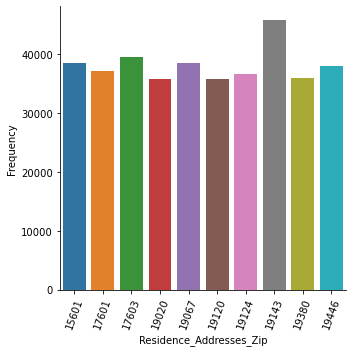

In [ ]:
sns.catplot(
  data=zip_count[:10], kind="bar",
  x="Residence_Addresses_Zip", y="Frequency")
plt.xticks(rotation=70)
plt.tight_layout()

In [ ]:
zip_count.describe()

,Residence_Addresses_Zip,Frequency
count,1805.000000,1805.000000
mean,17085.040443,4478.466482
std,1345.927026,6985.269457
min,15001.000000,1.000000
25%,15845.000000,221.000000
50%,17014.000000,1323.000000
75%,18219.000000,5629.000000
max,19611.000000,45867.000000


In [ ]:
Lon = []
Lat = []

for i in zip_count['Residence_Addresses_Zip']:
    try:
        zcdb = ZipCodeDatabase()
        zipcode = zcdb[i]
        Lon.append(zipcode.longitude)
        Lat.append(zipcode.latitude)
        
    except:
        zcdb = ZipCodeDatabase()
        zipcode = zcdb[19143]
        Lon.append(zipcode.longitude)
        Lat.append(zipcode.latitude)
        pass
zip_count['Lon'] = Lon
zip_count['Lat'] = Lat
zip_count.head()

,Residence_Addresses_Zip,Frequency,Lon,Lat
0,19143,45867,-75.22718,39.944162
1,17603,39472,-76.33328,40.032630
2,15601,38473,-79.54126,40.298765
3,19067,38456,-74.81812,40.214661
4,19446,38031,-75.29156,40.237206


In [ ]:
zip_count.describe()

,Residence_Addresses_Zip,Frequency,Lon,Lat
count,1805.000000,1805.000000,1805.000000,1805.000000
mean,17085.040443,4478.466482,-77.680808,40.628614
std,1345.927026,6985.269457,1.805165,0.588844
min,15001.000000,1.000000,-80.506110,39.724825
25%,15845.000000,221.000000,-79.495220,40.150143
50%,17014.000000,1323.000000,-77.650460,40.503768
75%,18219.000000,5629.000000,-75.966830,41.005075
max,19611.000000,45867.000000,-74.705530,42.195488


In [ ]:
df_1 = df_1.merge(zip_count, left_on='Residence_Addresses_Zip', right_on='Residence_Addresses_Zip')
df_1.head()

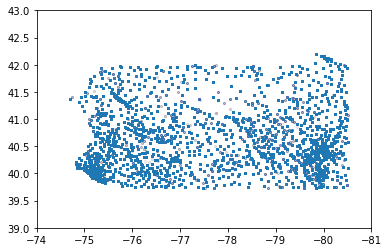

In [ ]:
# scatter plot of Pennsylvania voters by longitude / latitude
plt.scatter(df_1['Lon'], df_1['Lat'], alpha=0.003, marker='o', s=5)
plt.xlim(-74, -81)
plt.ylim(39, 43);

### 2.2 What is age distribution of voters by gender?

There average age of females is 51.48 and males is 50.38. There are more female voters than male voters. 53% of voters are female and 47% of voters are male. The most frequent age of female is 64 while males are 60 years old.

In [ ]:
df.select("Voters_Age").show(5)

+----------+
|Voters_Age|
+----------+
|        60|
|        38|
|        25|
|        25|
|        29|
+----------+
only showing top 5 rows



In [ ]:
df_2 = df.select("Voters_Age", "Voters_Gender")
df_2 = df_2.toPandas()
df_2 = df_2.loc[df_2["Voters_Gender"] != 'unknown' ]
df_2.head(5)

,Voters_Age,Voters_Gender
0,60,F
1,38,M
2,25,M
3,25,M
4,29,F


In [ ]:
# clean valeus where gender == 'unkown'
df_2.drop(df_2[df_2['Voters_Gender'] == 'unkown'].index, inplace = True)

In [ ]:
# The average age by gender 
df_2.groupby("Voters_Gender")["Voters_Age"].mean()

Voters_Gender
F    51.482823
M    50.384650
Name: Voters_Age, dtype: float64

In [ ]:
# The median age by gender
df_2.groupby("Voters_Gender")["Voters_Age"].median()

Voters_Gender
F    52
M    51
Name: Voters_Age, dtype: int32

In [ ]:
# Percentage sum of voters by gender
df_2.groupby("Voters_Gender")["Voters_Age"].sum() / df_2["Voters_Age"].sum()

Voters_Gender
F    0.529693
M    0.470307
Name: Voters_Age, dtype: float64

In [ ]:
# Mode of age by gender
df_2.groupby(['Voters_Gender'])['Voters_Age'].agg(pd.Series.mode)

Voters_Gender
F    64
M    60
Name: Voters_Age, dtype: int32

<Figure size 792x720 with 0 Axes>

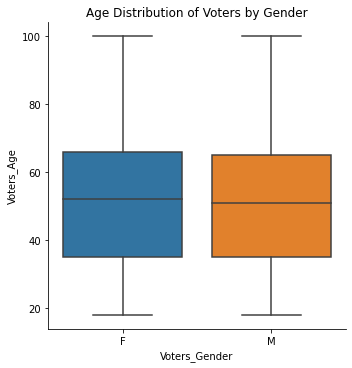

In [ ]:
# Plottting a Boxplot to check the distribution 
plt.figure(figsize=(11,10))
sns.catplot(x="Voters_Gender", y="Voters_Age", kind="box", data=df_2, showfliers = False).set(title='Age Distribution of Voters by Gender');

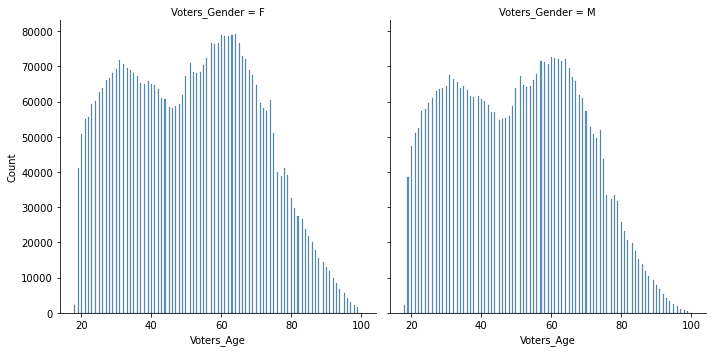

In [ ]:
# Dist plot to check the distribution
sns.displot(df_2, x = "Voters_Age", col = "Voters_Gender")

### 2.3 What’s the trend of voting participation over the years? is it decreasing or increasing?

Voting participation has increased over the years from 32% (year 2000) to 82% (year 2020). 2004 general election had the highest growth rate in turnout of 41.01% (32% to 45% turnout).

In [ ]:
df_3 = df.select("General_2000","General_2004", "General_2008", "General_2012","General_2016", "General_2020")
df_3 = df_3.toPandas()
df_3.head(5)

,General_2000,General_2004,General_2008,General_2012,General_2016,General_2020
0,N,N,N,N,N,N
1,N,N,N,N,N,N
2,N,N,N,N,N,N
3,N,N,N,N,Y,Y
4,N,N,N,N,N,Y


In [ ]:
df_3.describe()

,General_2000,General_2004,General_2008,General_2012,General_2016,General_2020
count,8083632,8083632,8083632,8083632,8083632,8083632
unique,2,2,2,2,2,2
top,N,N,Y,Y,Y,Y
freq,5526290,4477570,4287719,4597727,5466786,6625682


In [ ]:
# replace N and Y to 0s and 1s
df_3_numerical = df_3.replace(to_replace=['N', 'Y'], value=[0, 1])
df_3_numerical.head()

,General_2000,General_2004,General_2008,General_2012,General_2016,General_2020
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,1,1
4,0,0,0,0,0,1


In [ ]:
# calculating percentage sum
df_3_numerical = (df_3_numerical.sum(axis=0)/len(df_3)).rename_axis('Election').reset_index(name='Frequency')
df_3_numerical.head()

,Election,Frequency
0,General_2000,0.316361
1,General_2004,0.446094
2,General_2008,0.530420
3,General_2012,0.568770
4,General_2016,0.676278


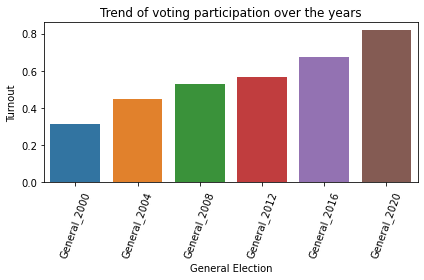

In [ ]:
# plotting turnout participation over the general elections
sns.barplot(x="Election", y="Frequency", data=df_3_numerical)
plt.title("Trend of voting participation over the years")
plt.xlabel("General Election")
plt.ylabel("Turnout")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [ ]:
# growth rate of turnout
df_3_numerical['pct_chg'] = df_3_numerical['Frequency'].pct_change().mul(100).round(2)

df_3_numerical.head()

,Election,Frequency,pct_chg
0,General_2000,0.316361,NaN
1,General_2004,0.446094,41.01
2,General_2008,0.530420,18.90
3,General_2012,0.568770,7.23
4,General_2016,0.676278,18.90


### 2.4 What parties are those voters from?

In the general 2020 election, the Democratic party made up 46.37% of the turnout while the Republican party made up 42.38% of the turnout. The Non-Partisan party made up 10.06% of the turnout. In the 2000 general election, the Democratic party made up 45.82% of the turnout while the Republican party made up 48.20% of the turnout. The Non-Partisan party made up 4.86% of the turnout. The Non-Partisan party steadily grew over the years. The Republican party steadily decreased over the years. The Democratic party had a small increase till 2008 and then a small decrease till 2020.

In [ ]:
df_4 = df.select("Parties_Description","General_2020","General_2016", "General_2012", "General_2008","General_2004", "General_2000")
df_4 = df_4.toPandas()
df_4.head(5)

,Parties_Description,General_2020,General_2016,General_2012,General_2008,General_2004,General_2000
0,Non-Partisan,N,N,N,N,N,N
1,Non-Partisan,N,N,N,N,N,N
2,Non-Partisan,N,N,N,N,N,N
3,Registered Independent,Y,Y,N,N,N,N
4,Unknown,Y,N,N,N,N,N


In [ ]:
df_4_numerical = df_4.replace(to_replace=['N', 'Y'], value=[0, 1])
df_4_numerical.head()

,Parties_Description,General_2020,General_2016,General_2012,General_2008,General_2004,General_2000
0,Non-Partisan,0,0,0,0,0,0
1,Non-Partisan,0,0,0,0,0,0
2,Non-Partisan,0,0,0,0,0,0
3,Registered Independent,1,1,0,0,0,0
4,Unknown,1,0,0,0,0,0


In [ ]:
df_4sum = df_4_numerical.groupby(['Parties_Description']).sum()
df_4sum.head()

,General_2020,General_2016,General_2012,General_2008,General_2004,General_2000
Parties_Description,,,,,,
American,141,128,86,68,53,24
American Independent,93,79,62,58,52,34
Anarchist,22,13,12,16,10,6
Bull Moose,24,22,14,14,2,1
Christian,62,54,54,41,33,15


In [ ]:
# calculating percentages of each party
df_4sum = df_4sum.iloc[:, :].apply(lambda x: x / x.sum()*100)
df_4sum.head()

,General_2020,General_2016,General_2012,General_2008,General_2004,General_2000
Parties_Description,,,,,,
Democratic,46.372340,47.767936,48.594353,48.791599,47.049688,45.823535
Non-Partisan,10.059629,8.119283,7.155199,6.873304,6.159565,4.856408
Registered Independent,1.183999,1.304431,1.213019,1.167490,1.127990,1.119889
Republican,42.384032,42.808350,43.037428,43.167606,45.662757,48.200168


In [ ]:
# filter parties where percentage is greater than 1%
df_4sum = df_4sum[df_4sum['General_2020'] > 1].sort_values(by=['General_2020', 'General_2016','General_2012','General_2008','General_2004','General_2000'],ascending=False)
df_4sum

,General_2020,General_2016,General_2012,General_2008,General_2004,General_2000
Parties_Description,,,,,,
Democratic,46.372340,47.767936,48.594353,48.791599,47.049688,45.823535
Republican,42.384032,42.808350,43.037428,43.167606,45.662757,48.200168
Non-Partisan,10.059629,8.119283,7.155199,6.873304,6.159565,4.856408
Registered Independent,1.183999,1.304431,1.213019,1.167490,1.127990,1.119889


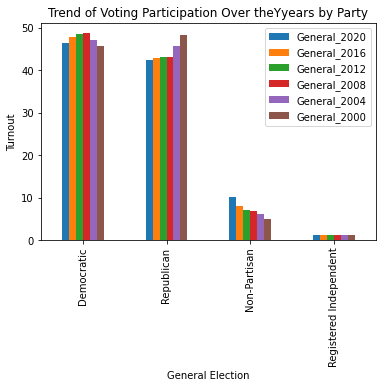

In [ ]:
df_4sum.plot.bar()
plt.title("Trend of Voting Participation Over theYyears by Party")
plt.xlabel("General Election")
plt.ylabel("Turnout %")
plt.show()

### 2.5 What does the ethnic composition of the voters look like in PA?

The dominant ethnicity in PA are the English / Welsh which make up 29% of the voters followed by Germans (11%).


In [ ]:
df_5 = df.select("Ethnic_Description")
df_5 = df_5.toPandas()

In [ ]:
df_5.head(5)

,Ethnic_Description
0,English/Welsh
1,Irish
2,unkown
3,English/Welsh
4,English/Welsh


In [ ]:
# total count for percentage calculation
total = df_5.count()[0]
total

7138609

In [ ]:
# clean valeus where gender == 'unkown'
df_5.drop(df_5[df_5['Ethnic_Description'] == 'unkown'].index, inplace = True)

In [ ]:
# frequency of ethnicities
ethnic_count = df_5['Ethnic_Description'].value_counts()
ethnic_count.head()

English/Welsh             2403636
German                     909843
Likely Af-Am (Modeled)     687675
Irish                      644419
Italian                    557991
Name: Ethnic_Description, dtype: int64

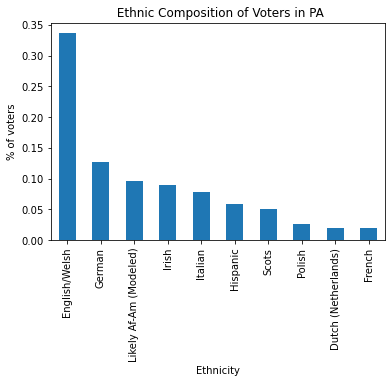

In [ ]:
((df_5['Ethnic_Description'].value_counts())/total)[:10].plot.bar()
plt.title(" Ethnic Composition of Voters in PA")
plt.xlabel("Ethnicity")
plt.ylabel("% of voters")
plt.show()

### 2.6 What is the distribution of turnout rate by different avg per person income?


Voters who voted in the 2020 general election have a higher income (51k) than voters who did not voted in the 2020 general election (48.6k) on average.

In [ ]:
df_6 = df.select("General_2020", "IncomeHMValue","PerIncome","OverMIncome")
df_6 = df_6.toPandas()

In [ ]:
df_6.head()

,General_2020,IncomeHMValue,PerIncome,OverMIncome
0,N,0.44,86805.0,N
1,N,0.44,86805.0,N
2,N,0.44,86805.0,N
3,Y,1.05,138000.0,Y
4,Y,0.20,39000.0,N


In [ ]:
# average income per person of those who voted in the 2020 election
df_6.groupby("General_2020")["PerIncome"].mean()

General_2020
N    48576.899444
Y    51015.069775
Name: PerIncome, dtype: float64

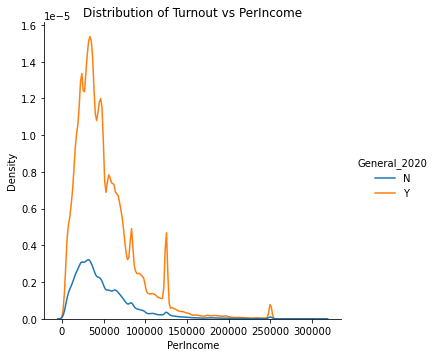

In [ ]:
# distribution plot of voters and their income grouped by if they voted in the 2020 general election
sns.displot(data=df_6, x="PerIncome", hue="General_2020", kind="kde").set(title='Distribution of Turnout vs PerIncome')

### 2.7 Is there a relationship between turnout rate and high standard of living (ratio of income to home value)?

We define high standard of living by analyzing the ratio of income to home value. The catplot below shows that the average ratio of income to value in non-voters are slighlty higher than the voters group. However, there's not a clear relationsip between turnout rate and standard of living. 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
df_7 = df.select("General_2020", "IncomeHMValue")
df_7 = df_7.toPandas()
df_7.head(5)

,General_2020,IncomeHMValue
0,N,0.44
1,N,0.44
2,N,0.44
3,Y,1.05
4,Y,0.20


In [ ]:
# the average ratios of income to home value in Vote group and Not-vote group 
df_7.groupby("General_2020")["IncomeHMValue"].mean()

General_2020
N    0.464857
Y    0.454484
Name: IncomeHMValue, dtype: float64

<Figure size 792x720 with 0 Axes>

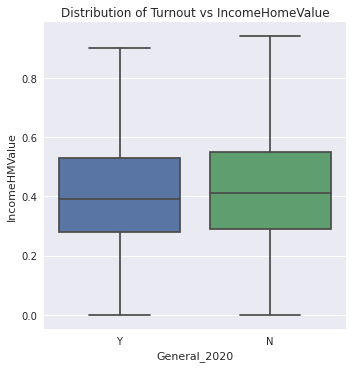

In [ ]:
## Plottting a Boxplot to check the distribution 
plt.figure(figsize=(11,10))
order = ["Y", "N"]
sns.catplot(x="General_2020", y="IncomeHMValue", kind="box", data=df_7, showfliers = False, order=order).set(title='Distribution of Turnout vs IncomeHomeValue');

### 2.8 Whether a family's economic situation (household income >or<the area median income) affects turnout?

Most non-voters in 2020 have household income over the median income of the area from the catplot. When we take a further look at the components of these two groups, we found out that a large number of (69.3%) people from Y group (with better family financial condition) voted in 2020 and 30.7% did not vote. In the group of people with lower household income than the median, 78.5% voted in 2020, and 21.5% did not vote in 2020. We can tell from the difference (around 10%) that people with lower household income than the area median actually were more likely to vote in 2020. It might be because the family with financial issues would care more about how the policy affects their financial/economic situation. 

Next, we will compare this person's household income to the median of their own area. This value is informative for understanding the family's economic situation.

In [ ]:
df.select("OverMIncome").show()

+-----------+
|OverMIncome|
+-----------+
|          N|
|          N|
|          N|
|          Y|
|          N|
|          N|
|          N|
|          N|
|          N|
|          N|
|          N|
|          N|
|          N|
|          N|
|          N|
|          N|
|          N|
|          N|
|          N|
|          N|
+-----------+
only showing top 20 rows



In [ ]:
df_8 = df.select("General_2020", "OverMIncome")
df_8 = df_8.toPandas()
df_8.head(5)

,General_2020,OverMIncome
0,N,N
1,N,N
2,N,N
3,Y,Y
4,Y,N


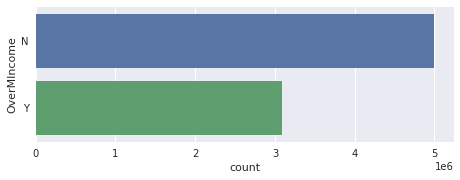

In [ ]:
order = ["Y", "N"]
sns.catplot(y="OverMIncome", kind="count", data=df_8, height=2.6, aspect=2.5,hue_order=order);

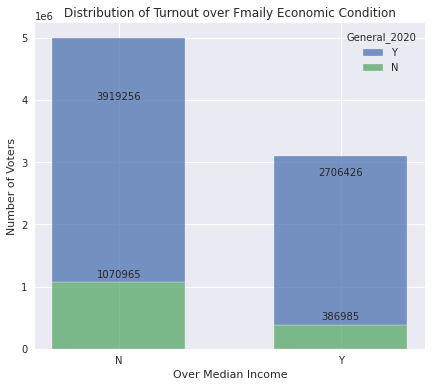

In [ ]:
plt.figure(figsize=[7,6])
order = ["Y", "N"]
plots_thrs = sns.histplot(data = df_8,x="OverMIncome",hue="General_2020", multiple="stack", shrink = 0.6, hue_order=order)

# Iterrating over the bars one-by-one
for bar in plots_thrs.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots_thrs.annotate(format(bar.get_height(), '.0f'),  
                    (bar.get_x() + bar.get_width() / 2, 
                     bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')


plt.xlabel("Over Median Income")
plt.ylabel("Number of Voters")
plt.title("Distribution of Turnout over Fmaily Economic Condition")
plt.show()

### 2.9 what’s the turnout rate among different education levels?

Except Unknown type, the most prevelant educaiton background among voters are high school diploma with 1,745,054 and bachelor degree with 1,489,844. People with higher educaiton are more likely to vote since 90.7% (2,186,475 out of 2,410,182) people holding bachelor or grad degree voted in 2020. Among people who have high school diploma or come from some college, a large part of them (1,503,508) voted in 2020, but the turnout rate of 86.1% is lower than higher education of 90.7%. The less educated a person gets, the less likely they voted in 2020. We can tell from the fact that not many people who voted in 2020 hold less than high school diploma or vocational technical degree. 

In [ ]:
df_9 = df.select("General_2020","CommercialData_Education")
df_9 = df_9.toPandas()
df_9.head(5)

,General_2020,CommercialData_Education
0,N,unkown
1,N,unkown
2,N,unkown
3,Y,Some College - Likely
4,Y,Some College - Likely


In [ ]:
df_9.groupby(["CommercialData_Education", "General_2020"])["General_2020"].count()

CommercialData_Education                        General_2020
Bach Degree - Extremely Likely                  N                 83755
                                                Y                898881
Bach Degree - Likely                            N                 65112
                                                Y                442096
Grad Degree - Extremely Likely                  N                 30263
                                                Y                494678
Grad Degree - Likely                            N                 44577
                                                Y                350820
HS Diploma - Extremely Likely                   N                121022
                                                Y                881707
HS Diploma - Likely                             N                120524
                                                Y                621801
Less than HS Diploma - Ex Like                  N                   423
   

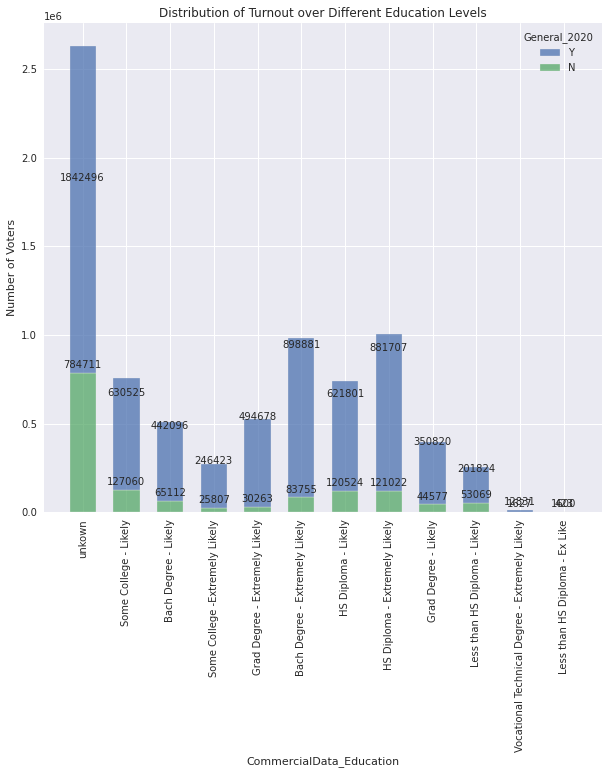

In [ ]:
plt.figure(figsize=[10,9])
oder=["Y", "N"]
plots_thrs = sns.histplot(data = df_9,x="CommercialData_Education",hue="General_2020", multiple="stack", shrink = 0.6, hue_order=order)

# Iterrating over the bars one-by-one
for bar in plots_thrs.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots_thrs.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

plt.xlabel("CommercialData_Education")
plt.ylabel("Number of Voters")
plt.title("Distribution of Turnout over Different Education Levels")
plt.xticks(rotation = 90)
plt.show()

### 2.10 what's the turnout rate among different occupation groups?

39.1% of records have uncomplete data occupation groups. Except that, among all the records, a large number of people 10.6% are from occupation group of Professional: Legal/Education and Health Practitioner. Blue collar, Business, and retired people are also prevelant among voters. Based on the 2020 voting results, voters who work in legal, education, and healthcare industry are more likely to vote than people in other industries. We can see the reason behind it because of the occupational background in legal field, law professionals are more likely to participate in election process 

In [ ]:
from pyspark.sql.functions import translate
df.withColumn('CommercialData_OccupationGroup', translate('CommercialData_OccupationGroup', 
                                                               "Technical: Computers/Math and Architect/Engineeri", "Technical: Computers/Math and Architect/Engineerin")) \
  .show(truncate=False)

+--------------+-------------+-------------+----------+----------------------+------------------+----------------------+------------+------------+------------+------------+------------+------------+------------------------------+---------------------------+--------------------------------------+--------------------------------+--------------------------+------------------------------------------+------------------------+-------------------------------------------------+-------------------------------------+-----------------------+---------+-------------+-----------+
|LALVOTERID    |Voters_Active|Voters_Gender|Voters_Age|Parties_Description   |Ethnic_Description|Mailing_Addresses_City|General_2020|General_2016|General_2012|General_2008|General_2004|General_2000|CommercialData_Education      |CommercialData_EstHomeValue|CommercialData_EstimatedHHIncomeAmount|CommercialData_EstimatedHHIncome|Residence_Families_HHCount|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_LandValue|Com

In [ ]:
df.select("CommercialData_OccupationGroup").distinct().show(truncate=False)

+--------------------------------------------------+
|CommercialData_OccupationGroup                    |
+--------------------------------------------------+
|Sales                                             |
|Professional: Legal/Education and Health Practiti |
|Blue Collar                                       |
|Technical: Computers/Math and Architect/Engineeri |
|Technical: Computers/Math and Architect/Engineerin|
|Other                                             |
|Office and Administrative Support                 |
|1                                                 |
|Management/Business and Financial Operations      |
|Farming/Fish/Forestry                             |
|Retired                                           |
+--------------------------------------------------+



In [ ]:
df_10 = df.select("General_2020","CommercialData_OccupationGroup")
df_10 = df_10.toPandas()
df_10.head(5)

,General_2020,CommercialData_OccupationGroup
0,N,1
1,N,1
2,N,1
3,Y,Sales
4,Y,Office and Administrative Support


In [ ]:
occp_vote = df_10.groupby(['CommercialData_OccupationGroup','General_2020'])['General_2020'].aggregate('count')
occp_vote

CommercialData_OccupationGroup                      General_2020
1                                                   N                861076
                                                    Y               2301504
Blue Collar                                         N                127278
                                                    Y                669137
Farming/Fish/Forestry                               N                  1617
                                                    Y                  8313
Management/Business and Financial Operations        N                 52714
                                                    Y                615936
Office and Administrative Support                   N                 65318
                                                    Y                461847
Other                                               N                125748
                                                    Y                598382
Professional: Legal/Edu

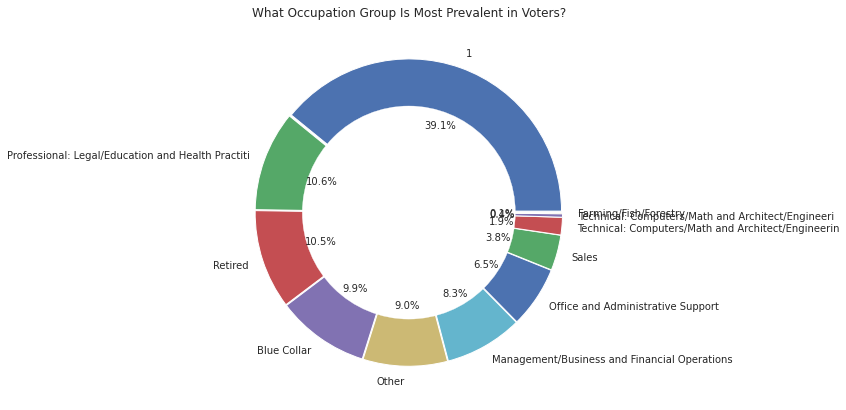

In [ ]:
# donut chart 
# create data
plt.figure(figsize=(9,7))
values_m = df_10["CommercialData_OccupationGroup"].value_counts()
labels_m = values_m.index
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(values_m, autopct="%.1f%%", explode=[0.01]*len(values_m), labels=labels_m, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("What Occupation Group Is Most Prevalent in Voters?")
plt.show()

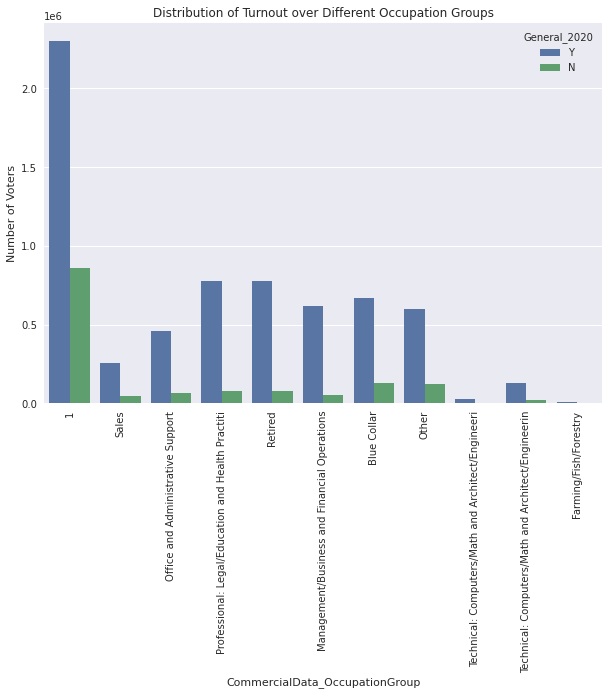

In [ ]:
plt.figure(figsize=(10,7))
order=["Y","N"]
ax = sns.countplot(x="CommercialData_OccupationGroup", hue='General_2020', data=df_10, hue_order=order)
plt.xlabel("CommercialData_OccupationGroup")
plt.ylabel("Number of Voters")
plt.title("Distribution of Turnout over Different Occupation Groups")
plt.xticks(rotation = 90)
plt.show()

### 2.11 Is there a difference in turnout among house owners or renters?

The bar charts indicate the proporation of house owners and renters among 2020 voters and non-voters. The results show that over 80% of people are likely homeowner in both voters and non-voters group. 
It's more obvious in the voters group in which 61.1% are likely homeowners, and only 16.74% are renters. Non-voters group has slightly higher proportion of renters of 34.76% than owners of 31.79%. In other words, house owners are more likely to vote than house renters. 

In [ ]:
df_11 = df.select("General_2020","CommercialDataLL_Home_Owner_Or_Renter")
df_11 = df_11.toPandas()
df_11.head()

,General_2020,CommercialDataLL_Home_Owner_Or_Renter
0,N,unkown
1,N,Likely Renter
2,N,Likely Renter
3,Y,Likely Renter
4,Y,Likely Renter


In [ ]:
## Function to create pie plot, takes input as list of features and dataframe
def pie_plt(category, dataframe, h):    

  for cat in category:
    values_m = dataframe[cat].value_counts()
    labels_m = values_m.index
    plt.subplots(figsize = (7,5))

    plt.pie(values_m, labels=labels_m,  wedgeprops = { 'linewidth' : 0.1, 'edgecolor' : 'white' }
        ,explode=(0.1, 0.1, 0.1), autopct='%0.2f%%')
    plt.title(h + ' Ownership Proportion')
    plt.show()

In [ ]:
df_Y = df_11[df_11["General_2020"]=="Y"]
df_N = df_11[df_11["General_2020"]=="N"]

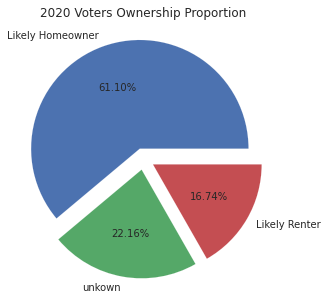

In [ ]:
## PLotting a pie chart for Voters in 2020
pie_plt(['CommercialDataLL_Home_Owner_Or_Renter'], df_Y, "2020 Voters")

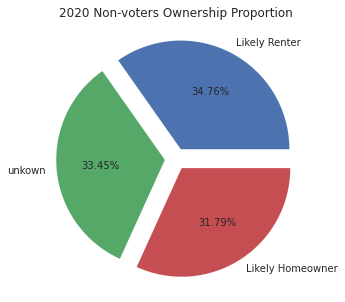

In [ ]:
## PLotting a pie chart for Non voter in 2020
pie_plt(['CommercialDataLL_Home_Owner_Or_Renter'], df_N, "2020 Non-voters")

## 3.Model building

In [ ]:
#inspect the features of the dataset again before furthering processing
df.printSchema()

root
 |-- LALVOTERID: string (nullable = true)
 |-- Voters_Active: string (nullable = true)
 |-- Voters_Gender: string (nullable = true)
 |-- Voters_Age: integer (nullable = true)
 |-- Parties_Description: string (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- Mailing_Addresses_City: string (nullable = true)
 |-- General_2020: string (nullable = true)
 |-- General_2016: string (nullable = true)
 |-- General_2012: string (nullable = true)
 |-- General_2008: string (nullable = true)
 |-- General_2004: string (nullable = true)
 |-- General_2000: string (nullable = true)
 |-- CommercialData_Education: string (nullable = true)
 |-- CommercialData_EstHomeValue: double (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: double (nullable = true)
 |-- CommercialData_EstimatedHHIncome: string (nullable = true)
 |-- Residence_Families_HHCount: integer (nullable = true)
 |-- CommercialData_EstimatedAreaMedianHHIncome: double (nullable = true)
 |-- CommercialData

In [ ]:
# because all the financial data reflects voter's financial situation in 2020, we think these data should be only applicable to the 2020 participation. Therefore, we decide to drop other years' election participation.
# we also drop cities, zip code, voter ID.
df = df.drop("General_2016","General_2012","General_2008","General_2004","General_2000","LALVOTERID","Mailing_Addresses_City","Residence_Addresses_Zip")

In [ ]:
df.printSchema()

root
 |-- Voters_Active: string (nullable = true)
 |-- Voters_Gender: string (nullable = true)
 |-- Voters_Age: integer (nullable = true)
 |-- Parties_Description: string (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- General_2020: string (nullable = true)
 |-- CommercialData_Education: string (nullable = true)
 |-- CommercialData_EstHomeValue: double (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: double (nullable = true)
 |-- CommercialData_EstimatedHHIncome: string (nullable = true)
 |-- Residence_Families_HHCount: integer (nullable = true)
 |-- CommercialData_EstimatedAreaMedianHHIncome: double (nullable = true)
 |-- CommercialData_LandValue: double (nullable = true)
 |-- CommercialData_OccupationGroup: string (nullable = true)
 |-- CommercialDataLL_Home_Owner_Or_Renter: string (nullable = true)
 |-- PerIncome: double (nullable = true)
 |-- IncomeHMValue: double (nullable = true)
 |-- OverMIncome: string (nullable = true)



### 3.1 Logistric Regression Model

In [ ]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula = "General_2020 ~ . ")

In [ ]:
fittedRF = supervised.fit(df)

In [ ]:
preparedDF = fittedRF.transform(df)

In [ ]:
preparedDF.select('features','label').show(2,False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                                           |label|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|(172,[1,3,6,43,130,141,142,144,154,155,156,157,168,169,170,171],[1.0,60.0,1.0,1.0,1.0,197916.0,86805.0,1.0,1.0,86805.0,36776.23392783078,1.0,1.0,86805.0,0.44,1.0])|1.0  |
|(172,[2,3,6,47,130,141,142,144,154,155,156,157,169,170,171],[1.0,38.0,1.0,1.0,1.0,197916.0,86805.0,1.0,1.0,86805.0,36776.23392783078,1.0,86805.0,0.44,1.0])        |1.0  |
+-------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
featureCols = pd.DataFrame(preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+
  preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols = featureCols.set_index('idx')
featureCols.head()

,name
idx,
0,Voters_Active_A
1,Voters_Gender_F
2,Voters_Gender_M
3,Voters_Age
4,Parties_Description_Democratic


In [ ]:
# Your answer goes here
train, test = preparedDF.randomSplit([0.7, 0.3], seed = 843)
test.show(1)

+-------------+-------------+----------+-------------------+------------------+------------+------------------------+---------------------------+--------------------------------------+--------------------------------+--------------------------+------------------------------------------+------------------------+------------------------------+-------------------------------------+---------+-------------+-----------+--------------------+-----+
|Voters_Active|Voters_Gender|Voters_Age|Parties_Description|Ethnic_Description|General_2020|CommercialData_Education|CommercialData_EstHomeValue|CommercialData_EstimatedHHIncomeAmount|CommercialData_EstimatedHHIncome|Residence_Families_HHCount|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_LandValue|CommercialData_OccupationGroup|CommercialDataLL_Home_Owner_Or_Renter|PerIncome|IncomeHMValue|OverMIncome|            features|label|
+-------------+-------------+----------+-------------------+------------------+------------+------------------

In [ ]:
# Your answer goes here
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression()

In [ ]:
# Your answer goes here
lrModel = lr.fit(train)

22/05/01 03:54:38 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/05/01 03:54:38 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [ ]:
plt.rcParams["figure.figsize"] = (8,6)

Text(0, 0.5, 'Beta Coefficients')

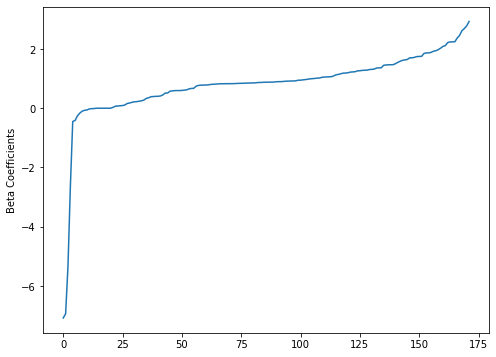

In [ ]:
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
#plt.xlabel(featureCols)

In [ ]:
coefsArray = np.array(lrModel.coefficients)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head()

,coefs,name
126,-7.077568,Ethnic_Description_Basque
118,-6.936919,Ethnic_Description_Nepalese
42,-5.320372,Parties_Description_Taxpayers
0,-2.652466,Voters_Active_A
167,-0.447070,CommercialDataLL_Home_Owner_Or_Renter_Likely H...


In [ ]:
plt.rcParams["figure.figsize"] = (20,3)

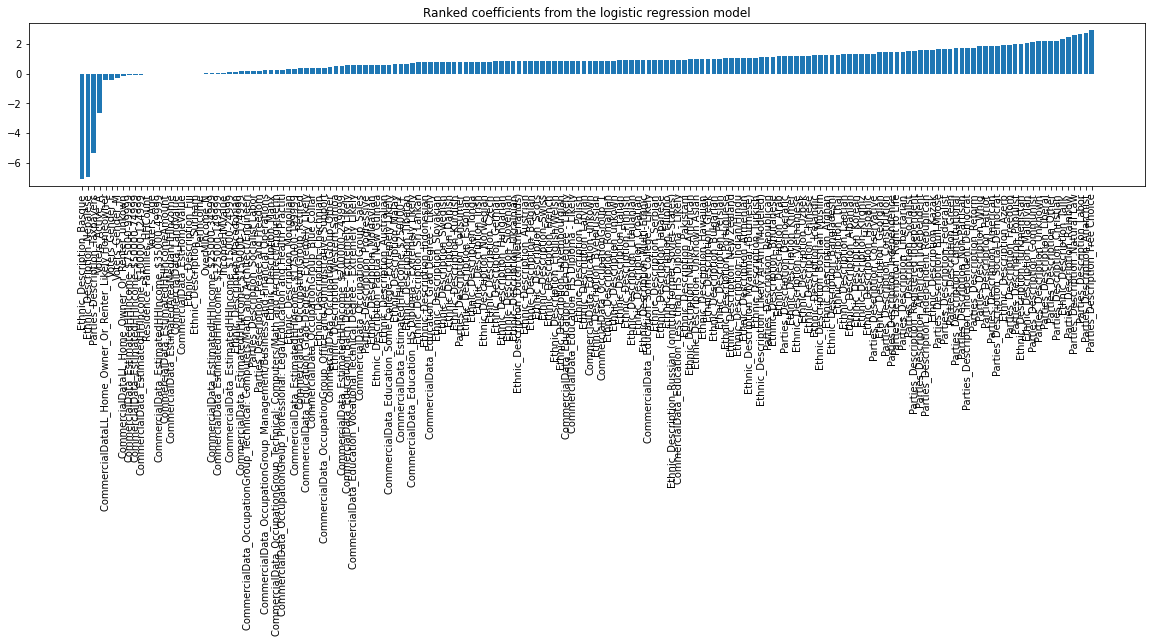

In [ ]:
plt.xticks(rotation=90)
plt.bar(coefsDF.name, coefsDF.coefs)
plt.title('Ranked coefficients from the logistic regression model')
plt.show()

In [ ]:
# take a look at factors with most influence
selected_coefs = coefsDF[(coefsDF['coefs']>1) | (coefsDF['coefs']< -1)]

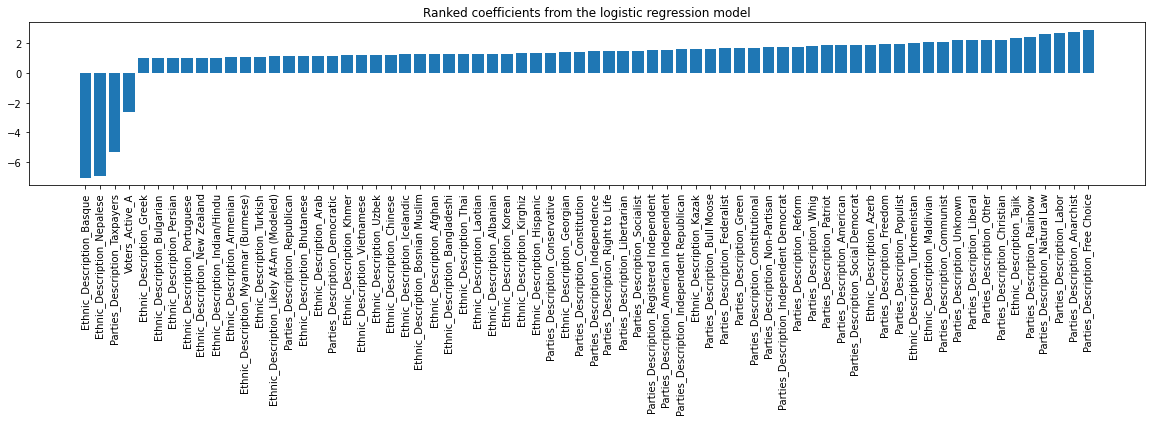

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=90)
plt.bar(selected_coefs.name, selected_coefs.coefs)
plt.title('Ranked coefficients from the logistic regression model')
plt.show()

In [ ]:
selected_coefs[:4]

,coefs,name
126,-7.077568,Ethnic_Description_Basque
118,-6.936919,Ethnic_Description_Nepalese
42,-5.320372,Parties_Description_Taxpayers
0,-2.652466,Voters_Active_A


In [ ]:
selected_coefs[-6:]

,coefs,name
128,2.366597,Ethnic_Description_Tajik
41,2.456407,Parties_Description_Rainbow
40,2.616148,Parties_Description_Natural Law
38,2.688692,Parties_Description_Labor
30,2.778062,Parties_Description_Anarchist
34,2.927127,Parties_Description_Free Choice


In [ ]:
summary = lrModel.summary

In [ ]:
print("Train AUC:", summary.areaUnderROC)

Train AUC: 0.7844605513378656


Visualize the `roc` DataFrame:

Train AUC: 0.7844605513378656


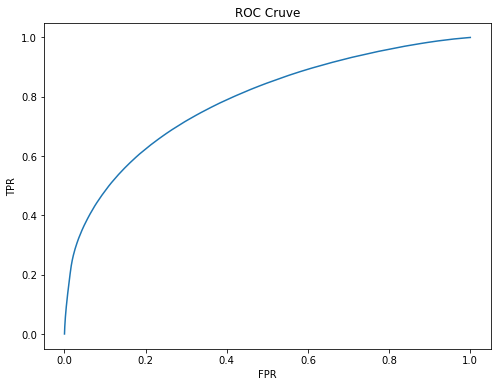

In [ ]:
roc = summary.roc.toPandas()
plt.rcParams["figure.figsize"] = (8,6)
roc.plot(x='FPR', y='TPR', style='-', legend=False)
plt.title('ROC Cruve')
plt.ylabel('TPR')

print('Train AUC:', summary.areaUnderROC)

In [ ]:
fittedTest = lrModel.transform(test)

In [ ]:
# Your answer goes here
fittedTest.select("label", "prediction", "rawPrediction").show(5, False)

+-----+----------+------------------------------------------+
|label|prediction|rawPrediction                             |
+-----+----------+------------------------------------------+
|1.0  |0.0       |[0.36325970476135155,-0.36325970476135155]|
|1.0  |0.0       |[1.0413114574301305,-1.0413114574301305]  |
|1.0  |0.0       |[1.5461187583047256,-1.5461187583047256]  |
|1.0  |0.0       |[0.7521397381633973,-0.7521397381633973]  |
|1.0  |0.0       |[1.3913947576930314,-1.3913947576930314]  |
+-----+----------+------------------------------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

In [ ]:
print('Test AUC:', aucEvaluator.evaluate(lrModel.transform(test)))
print('Train AUC:', summary.areaUnderROC)

Test AUC: 0.7843325713147403
Train AUC: 0.7844605513378656


### 3.2 Unsupervised Learning:  Principal Component Analysis - PCA

Use PCA to reduce dimensionality of the dataset 

In [ ]:
preparedDF = preparedDF.drop("label")  # we don't really need a label
preparedDF.show(1, False, vertical=True)

+-------------+-------------+----------+-------------------+------------------+------------+------------------------+---------------------------+--------------------------------------+--------------------------------+--------------------------+------------------------------------------+------------------------+------------------------------+-------------------------------------+---------+-------------+-----------+--------------------+
|Voters_Active|Voters_Gender|Voters_Age|Parties_Description|Ethnic_Description|General_2020|CommercialData_Education|CommercialData_EstHomeValue|CommercialData_EstimatedHHIncomeAmount|CommercialData_EstimatedHHIncome|Residence_Families_HHCount|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_LandValue|CommercialData_OccupationGroup|CommercialDataLL_Home_Owner_Or_Renter|PerIncome|IncomeHMValue|OverMIncome|            features|
+-------------+-------------+----------+-------------------+------------------+------------+------------------------+-----

In [ ]:
from pyspark.ml.feature import PCA as PCAml
from pyspark.ml.linalg import Vectors

In [ ]:
pca = PCAml(k=3, inputCol="features", outputCol="pca")
model = pca.fit(preparedDF)
transformed = model.transform(preparedDF)

22/05/01 04:00:01 WARN com.github.fommil.netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
22/05/01 04:00:01 WARN com.github.fommil.netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


In [ ]:
transformed.show(1, False, vertical=True)

-RECORD 0---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Voters_Active                              | I                                                                                                                                                                   
 Voters_Gender                              | F                                                                                                                                                                   
 Voters_Age                                 | 60                                                                                                                                                                  
 Parties_Description                        | Non-Partisan                                                                                                  

Visualize our data in the PC1, PC2  and PC3 axes:

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

firstElement=udf(lambda v:float(v[0]),FloatType())
secondElement=udf(lambda v:float(v[1]),FloatType())
thirdElement=udf(lambda v:float(v[2]),FloatType())
pcaDF = transformed.select(firstElement('pca'), secondElement('pca'),thirdElement('pca'), 'General_2020').toPandas()

In [ ]:
pcaDF.columns = ['pc1', 'pc2','pc3', 'General_2020']
pcaDF.head()

,pc1,pc2,pc3,General_2020
0,-231141.234375,-43726.304688,-69331.960938,N
1,-231141.234375,-43726.304688,-69331.960938,N
2,-231141.234375,-43726.304688,-69331.960938,N
3,-180388.421875,-108094.031250,-124657.281250,Y
4,-217229.687500,-2609.618652,-21517.900391,Y


In [ ]:
pcaDF = pcaDF.sample(1000)

In [ ]:
! pip install plotly==5.7.0

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(pcaDF, x='pc1', y='pc2', z='pc3',
              color='General_2020')
fig.show()

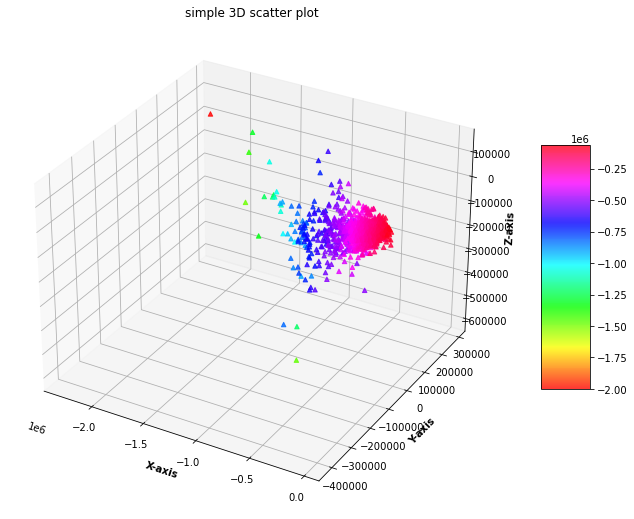

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
x = pcaDF.pc1
y = pcaDF.pc2
z = pcaDF.pc3
    

# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

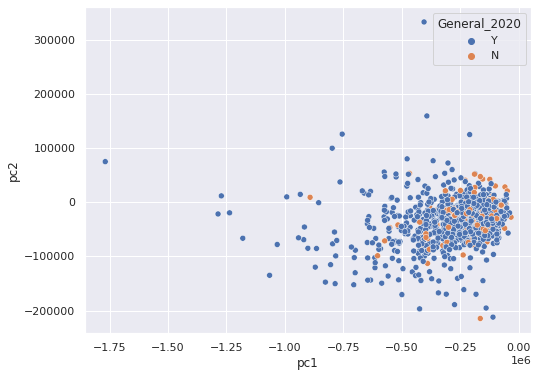

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})  # Figure size
sns.scatterplot(data=pcaDF, x='pc1', y='pc2', hue='General_2020');

### 3.3 Unsupervised Learning Model: K-means

In [ ]:
coefsDF

,coefs,name
86,-10.776068,Ethnic_Description_Mongolian
88,-8.886969,Ethnic_Description_Kurdish
82,-8.832110,Ethnic_Description_Icelandic
14,-8.752514,Parties_Description_Liberal
24,-8.734070,Parties_Description_Federalist
...,...,...
21,11.065850,Parties_Description_Socialist
20,11.812823,Parties_Description_Christian
87,12.415422,Ethnic_Description_Chechnian
84,12.878043,Ethnic_Description_Bosnian Muslim


In [ ]:
transformed.select('General_2020').show(2,False)

+------------+
|General_2020|
+------------+
|Y           |
|Y           |
+------------+
only showing top 2 rows



In [ ]:
cols = transformed.columns
cols.append('prediction')
cols.append('pca1')
cols.append('pca2')
cols.append('pca3')


In [ ]:
features = transformed.select('features')

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from sklearn import metrics

# Trains a k-means model.
kmeans = KMeans(k=2, seed=843)
model = kmeans.fit(features)

# Make predictions
predictions = model.transform(features)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.7330977796188665


In [ ]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[9.64443533e-01 5.10489058e-01 4.84913587e-01 4.98425190e+01
 4.25166118e-01 4.19832678e-01 1.30998305e-01 1.10848209e-02
 3.71489988e-03 4.68989477e-03 3.12276589e-03 8.91527585e-04
 6.47174027e-05 9.37495086e-05 5.56448696e-05 3.93143100e-05
 4.71771721e-05 2.29837505e-05 2.23789149e-05 3.20562836e-05
 2.60079282e-05 1.33063819e-05 1.93547373e-05 1.02822042e-05
 5.44351985e-06 6.65319093e-06 4.83868431e-06 6.65319093e-06
 3.02417770e-06 3.62901324e-06 2.41934216e-06 2.41934216e-06
 3.62901324e-06 4.23384877e-06 6.04835539e-07 6.04835539e-07
 2.41934216e-06 6.04835539e-07 6.04835539e-07 0.00000000e+00
 1.20967108e-06 1.20967108e-06 1.20967108e-06 2.81224332e-01
 1.33169665e-01 1.15582257e-01 2.27273002e-02 1.03137766e-01
 9.58277235e-02 2.68891736e-02 4.40737609e-02 2.35087477e-02
 1.65053570e-02 1.83519199e-02 1.06529684e-02 1.85563543e-02
 8.79733292e-03 1.00257539e-02 1.47658500e-02 6.05621825e-03
 4.71045918e-03 3.97376949e-03 6.01750878e-03 3.64655347e-03
 3.053

In [ ]:
predictions.show(5)

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|(172,[1,3,6,43,13...|         1|
|(172,[2,3,6,47,13...|         1|
|(172,[2,3,6,44,13...|         1|
|(172,[0,2,3,7,43,...|         1|
|(172,[0,1,3,10,43...|         1|
+--------------------+----------+
only showing top 5 rows



In [ ]:
transformed.show(1)

+-------------+-------------+----------+-------------------+------------------+------------+------------------------+---------------------------+--------------------------------------+--------------------------------+--------------------------+------------------------------------------+------------------------+------------------------------+-------------------------------------+---------+-------------+-----------+--------------------+--------------------+
|Voters_Active|Voters_Gender|Voters_Age|Parties_Description|Ethnic_Description|General_2020|CommercialData_Education|CommercialData_EstHomeValue|CommercialData_EstimatedHHIncomeAmount|CommercialData_EstimatedHHIncome|Residence_Families_HHCount|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_LandValue|CommercialData_OccupationGroup|CommercialDataLL_Home_Owner_Or_Renter|PerIncome|IncomeHMValue|OverMIncome|            features|                 pca|
+-------------+-------------+----------+-------------------+------------------+-

In [ ]:
# from pyspark.sql.functions import udf
# from pyspark.sql.types import FloatType

# firstElement=udf(lambda v:float(v[0]),FloatType())
# secondElement=udf(lambda v:float(v[1]),FloatType())
# thirdElement=udf(lambda v:float(v[2]),FloatType())
kMeansDf = predictions.select('*').toPandas()

In [ ]:
kMeansDf['General_2020'] = transformed.select('General_2020').toPandas()
auc = metrics.roc_auc_score(kMeansDf['General_2020'], kMeansDf['prediction'])
auc

0.4511320099734447

In [ ]:
kMeansDf.head()

,features,prediction
0,"(0.0, 1.0, 0.0, 60.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",1
1,"(0.0, 0.0, 1.0, 38.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",1
2,"(0.0, 0.0, 1.0, 25.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",1
3,"(1.0, 0.0, 1.0, 25.0, 0.0, 0.0, 0.0, 1.0, 0.0,...",1
4,"(1.0, 1.0, 0.0, 29.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1


In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(kMeansDf['General_2020'], kMeansDf['prediction'])
auc

0.4511320099734447

## 4.Summary 

Through our analysis, we found that while financial situation of voters do play into the level of participation in election, it is not as influential as we expected before the project. However, financial situation of voters is positively related to the level of voter participation as expected. 

During our analysis, we found that basic information such as parties affiliation, ethnicities, etc exert more weight in participation. The finding reflects current issues in the U.S., such as racial inequality and oligarch in politics. 